In [3]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=column_names)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
import pandas as pd
import numpy as np

data_array = df.to_numpy()

print(data_array)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

In [5]:
print("Shape dari dataset:", data_array.shape)
print("Size dari dataset:", data_array.size)

Shape dari dataset: (150, 5)
Size dari dataset: 750


In [6]:
setosa = df[df['species'] == 'Iris-setosa']
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iris-virginica']

In [7]:
setosa.to_csv('setosa.csv', index=False)
versicolor.to_csv('versicolor.csv', index=False)
virginica.to_csv('virginica.csv', index=False)

In [8]:
np.save('setosa.py', setosa.to_numpy())
np.save('versicolor.py', versicolor.to_numpy())
np.save('virginica.py', virginica.to_numpy())

In [9]:
np.savez(
    'iris_dataset.npz',
    setosa=setosa.to_numpy(),
    versicolor=versicolor.to_numpy(),
    virginica=virginica.to_numpy(),
)

In [10]:
print("size:", setosa.size)
print("size:", versicolor.size)
print("size:", virginica.size)

size: 250
size: 250
size: 250


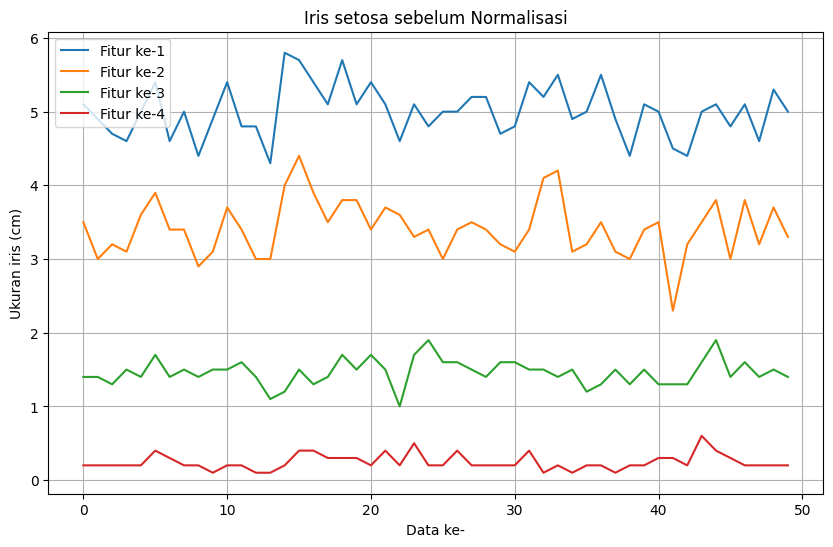

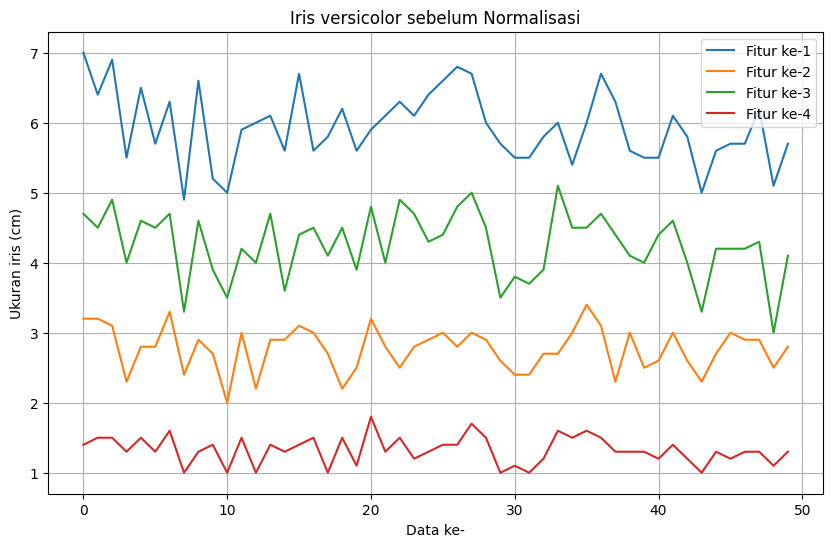

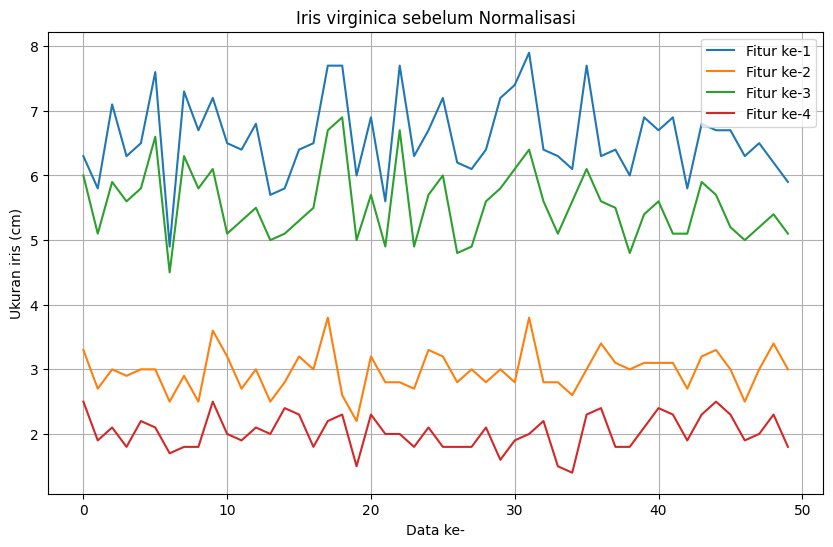

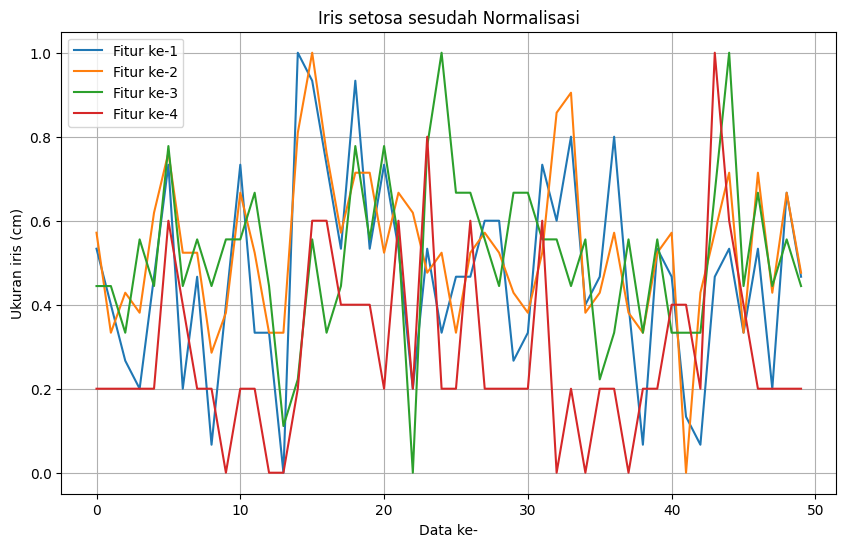

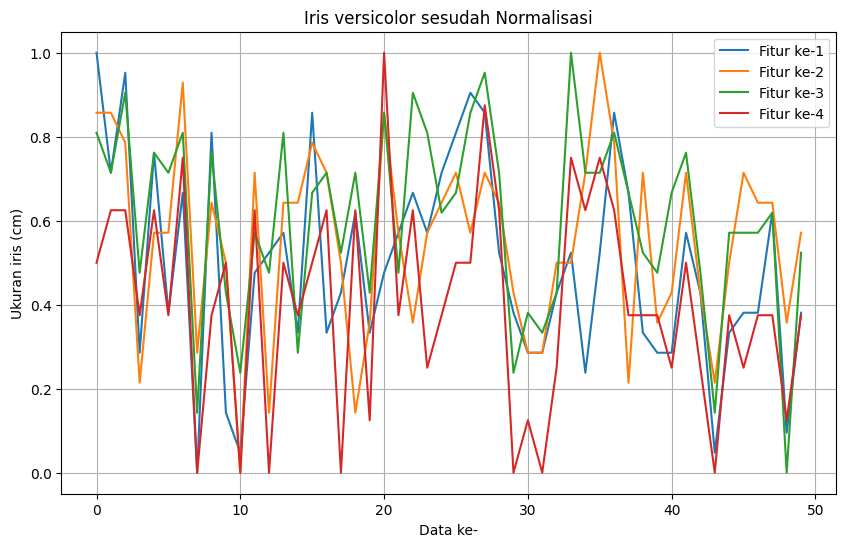

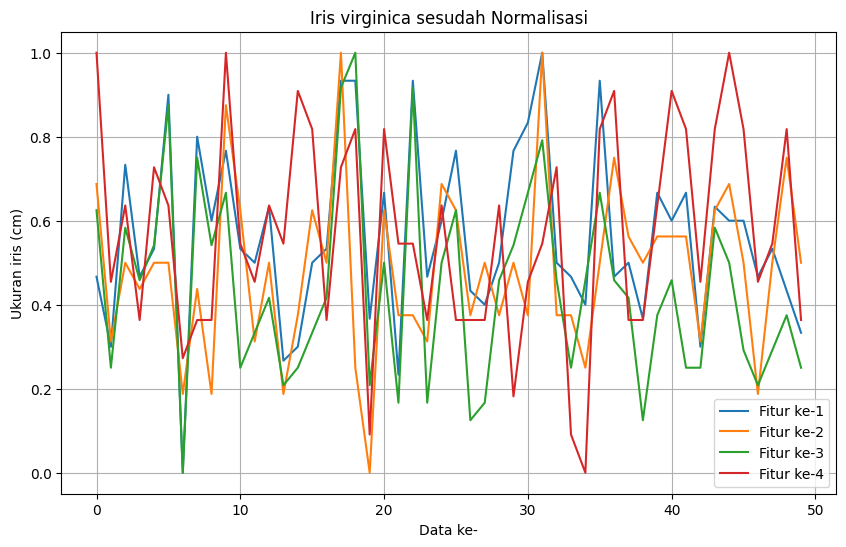

File Percobaan3_622021010.csv dan Percobaan3_622021010.npz sudah disimpan

Isi Percobaan3_622021010.csv:
   sepal_length  sepal_width  petal_length  petal_width  species
0      0.533333     0.571429      0.444444          0.2        0
1      0.400000     0.333333      0.444444          0.2        0
2      0.266667     0.428571      0.333333          0.2        0
3      0.200000     0.380952      0.555556          0.2        0
4      0.466667     0.619048      0.444444          0.2        0


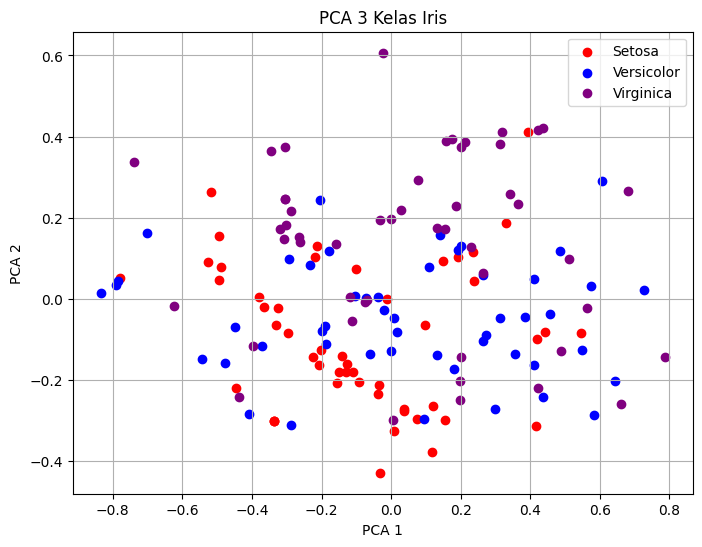

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris_setosa = np.load('setosa.py.npy', allow_pickle=True)
iris_versicolor = np.load('versicolor.py.npy', allow_pickle=True)
iris_virginica = np.load('virginica.py.npy', allow_pickle=True)

def plot_bunga(data, title):
    plt.figure(figsize=(10, 6))
    for i in range(4):
        plt.plot(data[:, i], label=f'Fitur ke-{i+1}')
    plt.title(title)
    plt.xlabel('Data ke-')
    plt.ylabel('Ukuran iris (cm)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_bunga(iris_setosa, "Iris setosa sebelum Normalisasi")
plot_bunga(iris_versicolor, "Iris versicolor sebelum Normalisasi")
plot_bunga(iris_virginica, "Iris virginica sebelum Normalisasi")

def min_max_normalize(data):
    min_vals = data[:, :4].min(axis=0)
    max_vals = data[:, :4].max(axis=0)
    normalized = (data[:, :4] - min_vals) / (max_vals - min_vals)
    return normalized

norm_setosa = min_max_normalize(iris_setosa)
norm_versicolor = min_max_normalize(iris_versicolor)
norm_virginica = min_max_normalize(iris_virginica)

plot_bunga(norm_setosa, "Iris setosa sesudah Normalisasi")
plot_bunga(norm_versicolor, "Iris versicolor sesudah Normalisasi")
plot_bunga(norm_virginica, "Iris virginica sesudah Normalisasi")

NIM = "622021010"

combined_data = np.vstack([
    np.hstack([norm_setosa, np.full((norm_setosa.shape[0], 1), 0)]),
    np.hstack([norm_versicolor, np.full((norm_versicolor.shape[0], 1), 1)]),
    np.hstack([norm_virginica, np.full((norm_virginica.shape[0], 1), 2)])
])

df_combined = pd.DataFrame(
    combined_data,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)

csv_filename = f"Percobaan3_{NIM}.csv"
df_combined.to_csv(csv_filename, index=False)

npz_filename = f"Percobaan3_{NIM}.npz"
np.savez(
    npz_filename,
    setosa=norm_setosa,
    versicolor=norm_versicolor,
    virginica=norm_virginica
)

print(f"File {csv_filename} dan {npz_filename} sudah disimpan")

print("\nIsi Percobaan3_622021010.csv:")
print(pd.read_csv(csv_filename).head())

df_combined = pd.read_csv(csv_filename)
full_class_data = df_combined[df_combined['species'].isin([0, 1, 2])].to_numpy()

X_all = full_class_data[:, 0:4].astype(float)
y_all = full_class_data[:, 4].astype(int)

pca = PCA(n_components=2)
X_2D_all = pca.fit_transform(X_all)

poin_setosa = X_2D_all[y_all == 0]
poin_versicolor = X_2D_all[y_all == 1]
poin_virginica = X_2D_all[y_all == 2]

plt.figure(figsize=(8, 6))
plt.scatter(poin_setosa[:, 0], poin_setosa[:, 1], color='red', marker='o', label='Setosa')
plt.scatter(poin_versicolor[:, 0], poin_versicolor[:, 1], color='blue', marker='o', label='Versicolor')
plt.scatter(poin_virginica[:, 0], poin_virginica[:, 1], color='purple', marker='o', label='Virginica')
plt.title("PCA 3 Kelas Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()